In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
Austin_data = "data/AllEvents_City_Austin_Property.csv"  

# Read the Data
Austin_df = pd.read_csv(Austin_data)

In [2]:
Austin_df.head()

,StatusCode,StatusMsg,IdentifierObPropId,IdentifierFips,IdentifierApn,IdentifierApnOrig,IdentifierAttomId,LotDepth,LotFrontage,LotLotsize1,...,AssessmentCalculationsCalclandvalue,AssessmentCalculationsCalcttlind,AssessmentCalculationsCalcttlvalue,AssessmentCalculationsCalcvaluepersizeunit,AssessmentMarketMktimprvalue,AssessmentMarketMktlandvalue,AssessmentMarketMktttlvalue,AssessmentTaxTaxamt,AssessmentTaxTaxpersizeunit,AssessmentTaxTaxyear
0,0,SuccessWithResult,4.460000e+12,48453,301888,301888,44641575,0,0,10.240,...,61440,MARKET VALUE,85732,76.55,24292,61440,85732,1879.0,1.68,2017
1,0,SuccessWithResult,4.460000e+12,48453,552752,552752,44649873,0,0,10.220,...,30660,MARKET VALUE,223010,96.88,192350,30660,223010,4650.0,2.02,2017
2,0,SuccessWithResult,3.570000e+12,48453,301889,301889,35684914,0,0,4.657,...,37256,MARKET VALUE,49982,36.54,12726,37256,49982,2061.0,1.51,2017
3,211,Success with results. Address positioning is a...,1.660000e+13,48453,301887,301887,166353924,0,0,20.430,...,97247,MARKET VALUE,103874,0.00,6627,97247,103874,2217.0,0.00,2017
4,0,SuccessWithResult,1.660000e+13,48453,301334,301334,166032426,0,0,15.550,...,111960,MARKET VALUE,156522,149.35,44562,111960,156522,3303.0,3.15,2017


In [3]:
# Count value for double bar graph
Austin_df['Count Value'] = 1

# new columns
Austin_cleaned = Austin_df[['AddressOneLine','LotLotsize2','LocationLongitude',\
'LocationLatitude','UtilitiesHeatingtype',\
'BuildingSizeLivingsize',\
'BuildingRoomsBathstotal','BuildingRoomsBeds', 'SummaryYearbuilt',\
'SaleAmountSaleamt','AssessmentTaxTaxamt','SummaryProptype','Count Value']]

# fill blank values with 0
Austin_cleaned.fillna(0, inplace=True)

# clean data results
Austin_cleaned = Austin_cleaned[Austin_cleaned['SaleAmountSaleamt'] > 0]
Austin_cleaned = Austin_cleaned[Austin_cleaned['AssessmentTaxTaxamt'] > 0]
Austin_cleaned = Austin_cleaned[Austin_cleaned['SummaryYearbuilt'] > 0]
Austin_cleaned = Austin_cleaned[Austin_cleaned['BuildingRoomsBathstotal'] > 0]
Austin_cleaned = Austin_cleaned[Austin_cleaned['BuildingRoomsBeds'] > 0]

# reset index
Austin_cleaned.reset_index(drop=True)

# display
Austin_cleaned

,AddressOneLine,LotLotsize2,LocationLongitude,LocationLatitude,UtilitiesHeatingtype,BuildingSizeLivingsize,BuildingRoomsBathstotal,BuildingRoomsBeds,SummaryYearbuilt,SaleAmountSaleamt,AssessmentTaxTaxamt,SummaryProptype,Count Value
227,"11700 MAHA LOOP RD, AUSTIN, TX 78719",221633,-97.683967,30.099442,0,1520,1.0,2,2008,137880,1840.0,SFR,1
496,"9704 RODRIGUEZ RD, AUSTIN, TX 78747",43560,-97.705351,30.116541,0,2243,2.0,3,1998,433438,2934.0,SFR,1
497,"9704 RODRIGUEZ RD, AUSTIN, TX 78747",43560,-97.705351,30.116541,0,2243,2.0,3,1998,433438,2934.0,SFR,1
724,"10109 SOUTHVIEW HILLS CV, AUSTIN, TX 78719",40511,-97.689231,30.124435,CENTRAL,2222,2.0,3,2011,284119,4146.0,SFR,1
955,"10008 GERTRUDIS LOOP, AUSTIN, TX 78747",6978,-97.746930,30.125750,CENTRAL,1706,3.0,4,2016,252098,5420.0,SFR,1
956,"10012 GERTRUDIS LOOP, AUSTIN, TX 78747",6190,-97.746930,30.125750,CENTRAL,1535,2.0,4,2016,241582,4326.0,SFR,1
964,"11117 ZOELLER DR, AUSTIN, TX 78747",9431,-97.746930,30.125750,CENTRAL,1899,2.0,3,2016,222605,5573.0,SFR,1
966,"5517 OMEARA CV, AUSTIN, TX 78747",9875,-97.746930,30.125750,CENTRAL,2612,3.0,5,2017,308200,747.0,RESIDENTIAL ACREAGE,1
974,"10920 ZOELLER DR, AUSTIN, TX 78747",10476,-97.746930,30.125750,CENTRAL,2822,3.0,5,2017,312425,712.0,SFR,1
975,"10212 GERTRUDIS LOOP, AUSTIN, TX 78747",6835,-97.746930,30.125750,CENTRAL,2159,3.0,4,2017,221425,496.0,SFR,1


In [4]:
Austin_groupby = Austin_cleaned.groupby(['BuildingRoomsBeds', 'BuildingRoomsBathstotal'])
Austin_groupby['Count Value'].count()

BuildingRoomsBeds  BuildingRoomsBathstotal
2                  1.0                          1
                   2.0                          3
3                  1.0                          2
                   2.0                        172
                   3.0                         30
4                  1.0                          2
                   2.0                         74
                   3.0                        127
                   4.0                         15
5                  3.0                         24
                   4.0                          4
6                  3.0                          1
Name: Count Value, dtype: int64

In [5]:
# to find n
len(Austin_groupby['Count Value'].sum())

12

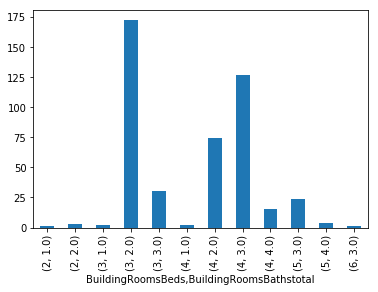

In [6]:
Austin_groupby['Count Value'].count().plot(kind='bar')

In [7]:
x_axis = np.sort(Austin_cleaned['SummaryYearbuilt'].unique())
x_axis

array([1972, 1976, 1978, 1979, 1984, 1992, 1993, 1996, 1997, 1998, 1999,
       2000, 2002, 2004, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [8]:
len(x_axis)

25

In [9]:
built_v_sales = Austin_cleaned[['SummaryYearbuilt','SaleAmountSaleamt']]
built_v_sales.reset_index(drop=True)
built_v_sales

,SummaryYearbuilt,SaleAmountSaleamt
227,2008,137880
496,1998,433438
497,1998,433438
724,2011,284119
955,2016,252098
956,2016,241582
964,2016,222605
966,2017,308200
974,2017,312425
975,2017,221425


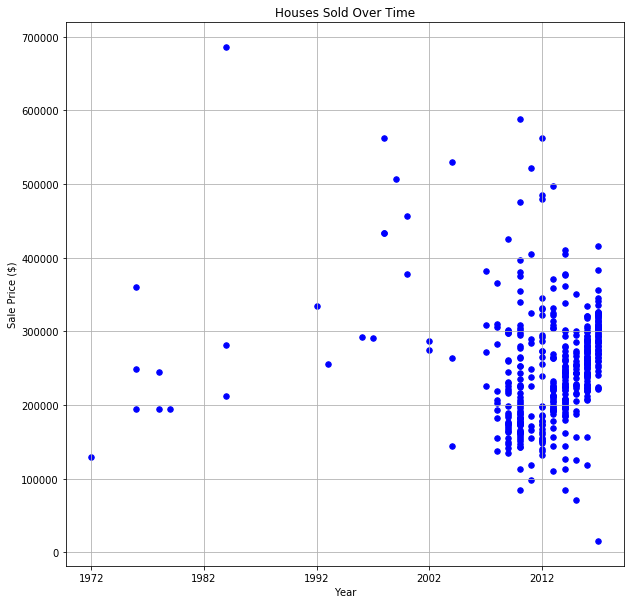

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(built_v_sales['SummaryYearbuilt'], built_v_sales['SaleAmountSaleamt'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(built_v_sales['SummaryYearbuilt']),max(built_v_sales['SummaryYearbuilt']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()

# Save the Figure
# plt.savefig("Images/TumorResponseToTreatment")

plt.show()

In [12]:
clean_year = built_v_sales.groupby(['SummaryYearbuilt'])
clean_year.mean()

,SaleAmountSaleamt
SummaryYearbuilt,
1972,129222.000000
1976,267819.666667
1978,219600.000000
1979,195000.000000
1984,393333.333333
1992,334509.000000
1993,255024.000000
1996,292726.000000
1997,291270.000000
